# Weather Forecast Project 


In [59]:
# import lib
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import pickle
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# reading dataset 
df = pd.read_csv('weatherAus.csv')
# Reading first five rows of our dataset 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# reading the last five rows of our system 
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.shape

(8425, 23)

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
# check null in percentage
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [8]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [9]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 18


In [10]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [11]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 4
Continuous feature Count 14


In [12]:
# filling the null value 
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [13]:
#Filling the missing values for continuous variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [14]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [15]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,
Adelaide,10.980000,10.980000,1.435237,5.121671,7.632205,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.566622,4.503183,15.861951,20.189756,0.214634,0.219512
Albury,10.062587,10.062587,2.129055,5.389395,7.632205,33.933951,8.248669,14.297245,72.604190,47.062845,1017.581477,1014.981477,5.285971,4.837624,14.555347,21.673539,0.219405,0.219405
Brisbane,15.369073,15.369073,3.109896,4.875629,7.918155,26.456341,6.031088,9.685781,66.474650,54.182210,1018.123661,1015.031731,3.694301,3.898969,20.685427,23.976141,0.233161,0.233161
CoffsHarbour,13.704244,13.704244,5.434707,3.700885,7.332570,38.872438,15.389027,20.512385,66.314239,60.648527,1018.587693,1016.097781,3.816694,4.116213,19.611620,21.745733,0.306056,0.304419
Darwin,21.324800,21.324800,2.735200,6.349558,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000,0.132000,0.128000
Melbourne,12.443280,12.443280,2.313878,4.529963,6.419399,45.779558,19.709001,22.697904,66.754405,51.245992,1017.845623,1016.075260,5.155148,5.127789,15.332999,19.952457,0.249075,0.250308
Newcastle,12.937727,12.937727,3.029054,5.389395,7.632205,40.174469,5.694822,12.746831,73.754842,55.915732,1017.640233,1015.236075,4.064556,4.348869,17.433322,22.324634,0.240876,0.240876
Penrith,11.279668,11.279668,2.361448,5.389395,7.632205,31.413225,5.626556,11.024896,72.863071,45.481328,1017.640233,1015.236075,4.566622,4.503183,15.533195,22.135270,0.240664,0.240664
PerthAirport,13.172674,13.172674,1.916279,5.784460,8.797117,44.797063,18.043189,21.353821,58.833887,42.131229,1017.082508,1014.548173,3.449336,3.559801,19.330648,24.472176,0.200997,0.200997


# visualize

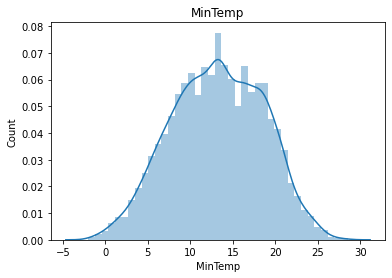

<Figure size 1080x1080 with 0 Axes>

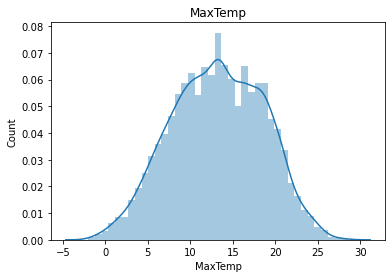

<Figure size 1080x1080 with 0 Axes>

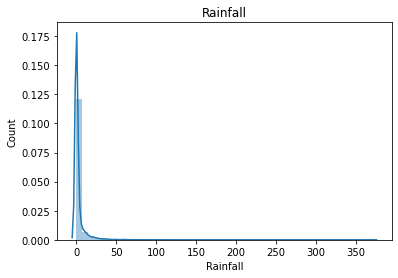

<Figure size 1080x1080 with 0 Axes>

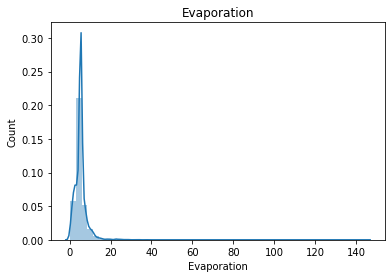

<Figure size 1080x1080 with 0 Axes>

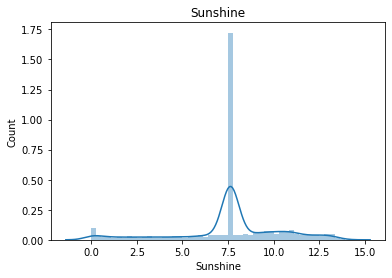

<Figure size 1080x1080 with 0 Axes>

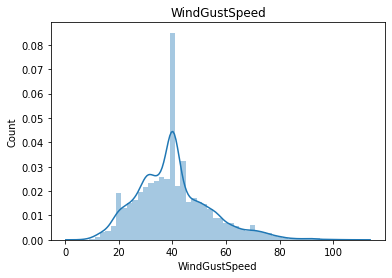

<Figure size 1080x1080 with 0 Axes>

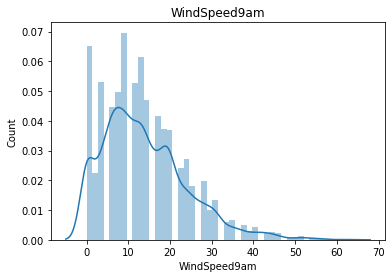

<Figure size 1080x1080 with 0 Axes>

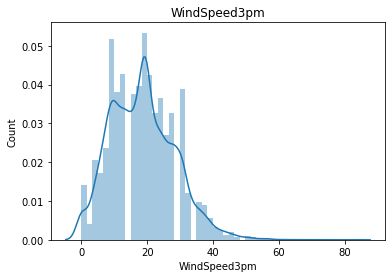

<Figure size 1080x1080 with 0 Axes>

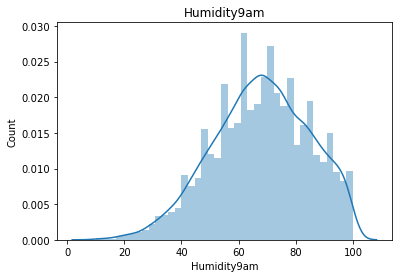

<Figure size 1080x1080 with 0 Axes>

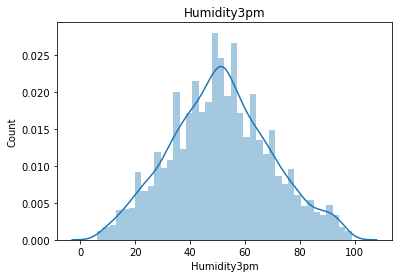

<Figure size 1080x1080 with 0 Axes>

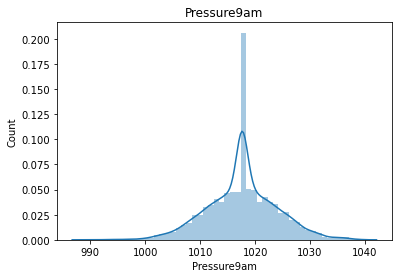

<Figure size 1080x1080 with 0 Axes>

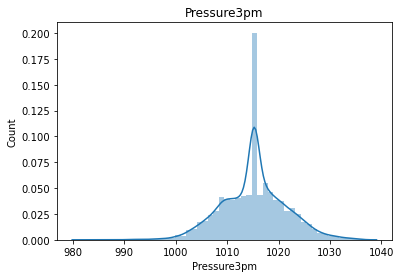

<Figure size 1080x1080 with 0 Axes>

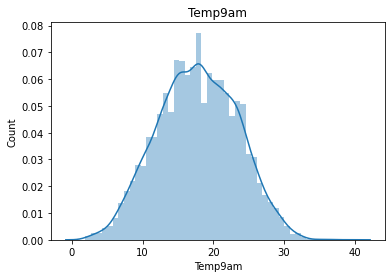

<Figure size 1080x1080 with 0 Axes>

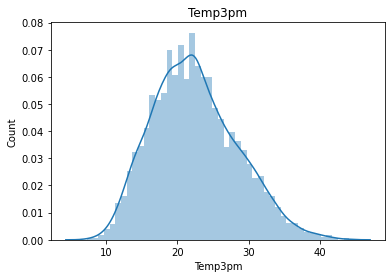

<Figure size 1080x1080 with 0 Axes>

In [16]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# checking correlation

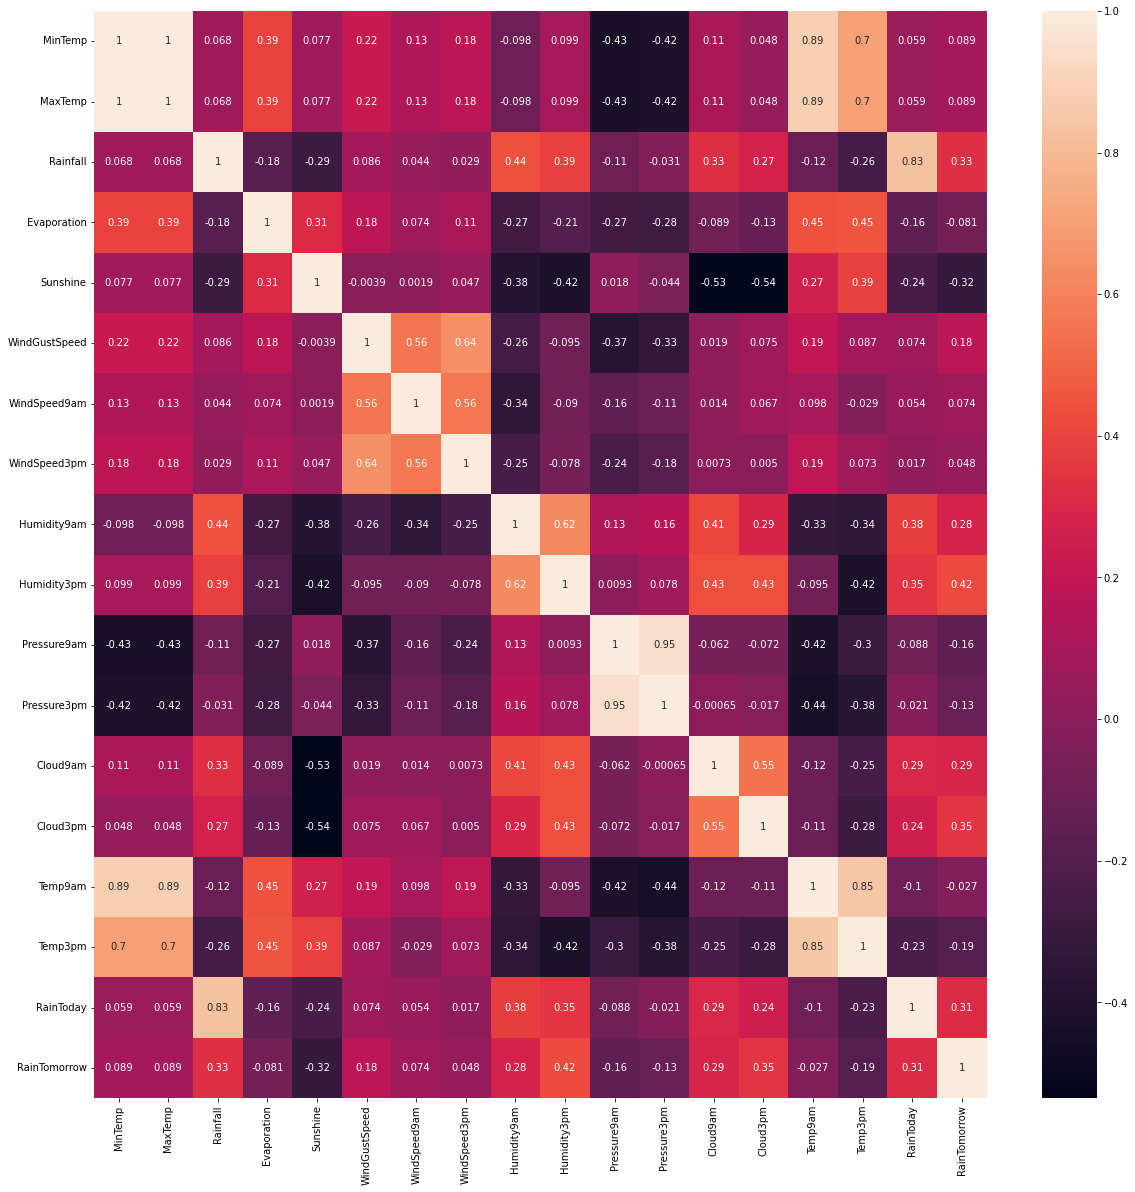

In [17]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [18]:
# doing labelencder train dataset transfer into 0,1,2...
from sklearn.preprocessing import LabelEncoder
cols = ['Location',"WindDir9am","WindDir3pm","WindGustDir"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,2008-12-02,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2008-12-03,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,2008-12-05,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [19]:
# dropping useless columns
df=df.drop(['Date'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
#dividing in x and y
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

In [21]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, random_state = 0)

In [23]:
# model training for catagorical label 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred))

0.8433234421364986


In [27]:
print(confusion_matrix(y_test,y_pred))

[[1205   81]
 [ 183  216]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1286
         1.0       0.73      0.54      0.62       399

    accuracy                           0.84      1685
   macro avg       0.80      0.74      0.76      1685
weighted avg       0.83      0.84      0.83      1685



In [29]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred))

0.8991097922848664


In [32]:
print(confusion_matrix(y_test,y_pred))

[[1238   48]
 [ 122  277]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1286
         1.0       0.85      0.69      0.77       399

    accuracy                           0.90      1685
   macro avg       0.88      0.83      0.85      1685
weighted avg       0.90      0.90      0.90      1685



In [34]:
#decision tree classifier
dtr=DecisionTreeClassifier()
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_predtr = dtr.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_predtr))

0.8468842729970326


In [37]:
print(classification_report(y_test,y_predtr))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1286
         1.0       0.66      0.72      0.69       399

    accuracy                           0.85      1685
   macro avg       0.79      0.80      0.79      1685
weighted avg       0.85      0.85      0.85      1685



In [38]:
##Initiate KNeighbors Classifier
knn=KNeighborsClassifier()
#model training
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_predknn = knn.predict(X_test)
print(accuracy_score(y_test,y_predknn))

0.8367952522255193


In [40]:
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1286
         1.0       0.71      0.52      0.60       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



# as we can see acurracy by random forest is high so we will go with random forest classifier

In [41]:
# save the model
# now save the model 
pickle.dump(rf,open('cl_weatherprediction','wb'))#

In [42]:
x = df.drop(["Rainfall"], axis=1)
y = df["Rainfall"]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x_scaled,y, test_size =0.2, random_state = 0)

In [47]:
# model training for regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [62]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)


1.0


# Ridge

In [63]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.9999999681580078


# RandomForestRegressor

In [64]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)


1.0


# DecisionTreeRegressor

In [66]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


# so we are taking ridge to make model 

In [67]:
# save the model
# now save the model 
pickle.dump(R,open('reg_weatherprediction','wb'))#